# **Requerimientos**

In [ ]:
!pip install astroquery
!pip install alerce
!pip install P4J

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.5/748.5 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for P4J: filename=P4J-1.1.2-cp311-cp311-linux_x86_64.whl size=3150319 sha256=f7a38966055657c24e48c718e84af7c6326938a79d28cb9a749444dad366677d
  Stored in directory: /root/.cache/pip/wheels/aa/90/af/54b9ae777d6c69dfd87ada1ce7fcb398237a96db14806e31c8
Successfully built P4J


In [ ]:
from alerce.core import Alerce
alerce=Alerce()
import numpy as np; import matplotlib.pyplot as plt
import sys ; import pandas as pd
import seaborn as sns; import os
import requests; import astropy.units as u

from astropy import coordinates
from astropy.time import Time
from astropy.table import Table, Column
from astropy.coordinates import Distance, Galactic, SkyCoord
from astropy.cosmology import WMAP7
from astroquery.ipac.irsa.irsa_dust import IrsaDust
from astroquery.ned import Ned
from IPython.display import HTML
from ipywidgets import Layout, Box, widgets
from astroquery.simbad import Simbad
import P4J

<ipython-input-2-4a645322218b>:14: DeprecationWarning: the ``ned`` module has been moved to astroquery.ipac.ned, please update your imports.
  from astroquery.ned import Ned


In [ ]:
min_firstmjd = Time("2017-11-01T00:00:00", format="isot", scale="utc").mjd + 100

RRLs = alerce.query_objects(classifier="lc_classifier",
                           class_name="RRL",
                           probability=0.5,ndet=[150, 3000],
                           order_by="probability",
                           order_mode="DESC",
                           first_mjd=[min_firstmjd, None],
                           count=False,
                           page_size=1000, format='pandas')

CEPs = alerce.query_objects(classifier="lc_classifier",
                           class_name="CEP",
                           probability=0.5,
                           ndet=[150, 3000],
                           order_by="probability",
                           order_mode="DESC",
                           first_mjd=[min_firstmjd, None],
                           count=False,
                           page_size=1000, format='pandas')

DSCTs = alerce.query_objects(classifier="lc_classifier",
                           class_name="DSCT",
                           probability=0.5,
                           ndet=[150, 3000],
                           order_by="probability",
                           order_mode="DESC",
                           first_mjd=[min_firstmjd, None],
                           count=False,
                           page_size=1000, format='pandas')

LPVs = alerce.query_objects(classifier="lc_classifier",
                           class_name="LPV",
                           probability=0.5,
                           ndet=[150, 3000],
                           order_by="probability",
                           order_mode="DESC",
                           first_mjd=[min_firstmjd, None],
                           count=False,
                           page_size=1000, format='pandas')

In [ ]:
cep_ar=CEPs["meanra"].values
cep_dec=CEPs["meandec"].values

rr_ar=RRLs["meanra"].values
rr_dec=RRLs["meandec"].values

dsct_ar=DSCTs["meanra"].values
dsct_dec=DSCTs["meandec"].values

lpv_ar=LPVs["meanra"].values
lpv_dec=LPVs["meandec"].values

In [ ]:
def equatorial_to_galactic(ra,dec):
  ra_rad=np.radians(ra)
  dec_rad=np.radians(dec)

  X_eq= np.cos(ra_rad)*np.cos(dec_rad)
  Y_eq= np.sin(ra_rad)*np.cos(dec_rad)
  Z_eq= np.sin(dec_rad)

  l_rad=np.arctan2(Y_eq,X_eq)
  b_rad=np.arcsin(Z_eq/np.sqrt(X_eq**2+Y_eq**2+Z_eq**2))

  l=np.degrees(l_rad)
  b=np.degrees(b_rad)

  return l,b

In [ ]:
cep_l,cep_b=equatorial_to_galactic(cep_ar,cep_dec)
rr_l,rr_b=equatorial_to_galactic(rr_ar,rr_dec)
dsct_l,dsct_b=equatorial_to_galactic(dsct_ar,dsct_dec)
lpv_l,lpv_b=equatorial_to_galactic(lpv_ar,lpv_dec)

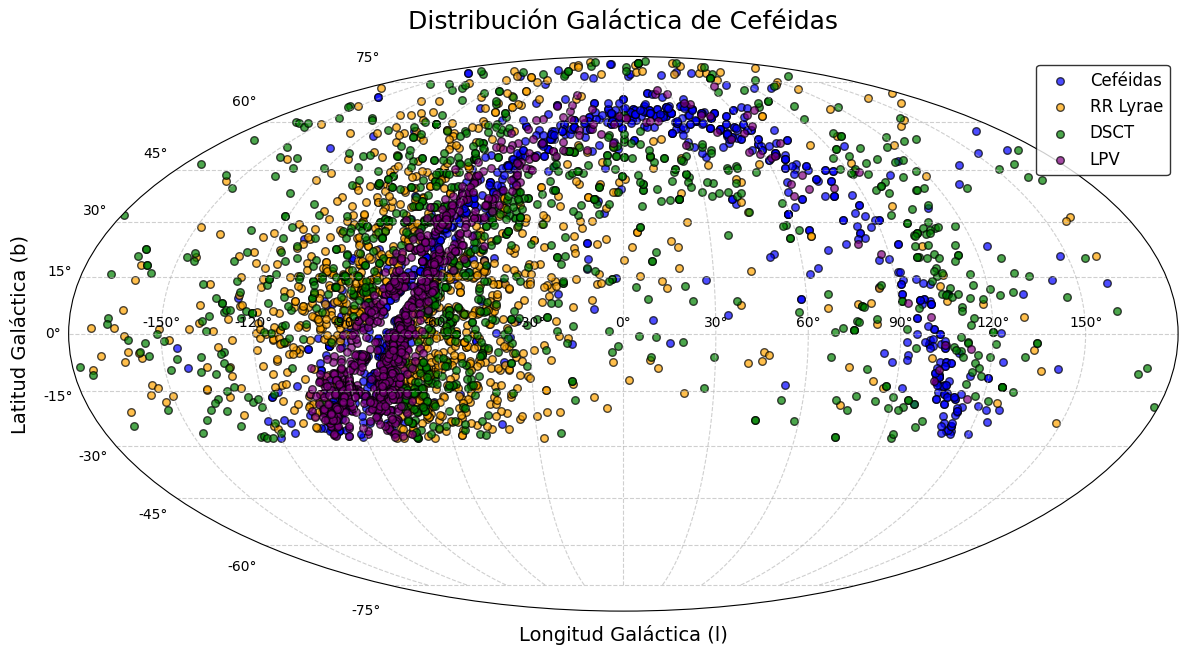

In [ ]:

# Convertir a radianes para el gráfico en proyección galáctica
l_rad_cep = np.radians(cep_l)
b_rad_cep = np.radians(cep_b)

l_rad_rr = np.radians(rr_l)
b_rad_rr = np.radians(rr_b)

l_rad_dsct = np.radians(dsct_l)
b_rad_dsct = np.radians(dsct_b)

l_rad_lpv = np.radians(lpv_l)
b_rad_lpv = np.radians(lpv_b)

# Crear el gráfico mejorado
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection="mollweide")  # Proyección Mollweide para mejor representación
ax.grid(True, linestyle='--', alpha=0.6)

# Graficar Ceféidas
scatter_cep = ax.scatter(
    l_rad_cep, b_rad_cep, c="blue", alpha=0.7, s=30, label="Ceféidas", edgecolor='black'
)

# Graficar RR Lyrae
scatter_rr = ax.scatter(
    l_rad_rr, b_rad_rr, c="orange", alpha=0.7, s=30, label="RR Lyrae", edgecolor='black'
)

# Graficar DSCT
scatter_dsct = ax.scatter(
    l_rad_dsct, b_rad_dsct, c="green", alpha=0.7, s=30, label="DSCT", edgecolor='black'
)

# Graficar LPV
scatter_lpv = ax.scatter(
    l_rad_lpv, b_rad_lpv, c="purple", alpha=0.7, s=30, label="LPV", edgecolor='black'
)
# Configurar el título, etiquetas y leyenda
plt.title("Distribución Galáctica de Ceféidas", fontsize=18, pad=20)
ax.set_xlabel("Longitud Galáctica (l)", fontsize=14, labelpad=10)
ax.set_ylabel("Latitud Galáctica (b)", fontsize=14, labelpad=10)

# Leyenda bien posicionada
plt.legend(loc="upper right", fontsize=12, frameon=True, edgecolor='black')

# Ajustar la visualización y mostrar
plt.tight_layout()
plt.show()